#CHALLENGE: Gaussian Mixture Model

####Description: A dataset with customer data.

####Objective:
* Prepare dataset
* Determine optimal numbers of clusters
* Create GMM model
* Interpret segments

In [25]:
%cd /content/drive/MyDrive/Business Analyst/Segmentation/Gaussian Mixture Model

/content/drive/MyDrive/Business Analyst/Segmentation/Gaussian Mixture Model


In [26]:
#Install libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [27]:
#Upload data
df = pd.read_csv('CC GENERAL.csv').dropna()
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


#Gaussian Mixture Model

In [28]:
#Create DF without CustomerID
data = df.iloc[:,1:]
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


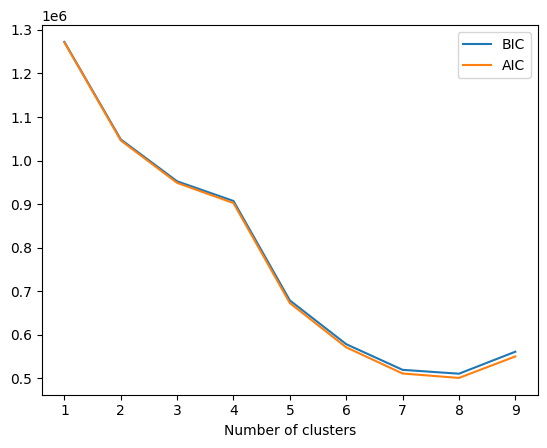

In [29]:
#Finding optimal number of clusters
n_components = np.arange(1, 10)

#Model loop
models = [GaussianMixture(n_components= n,
                          random_state= 1502).fit(data) for n in n_components]

#Plotting
plt.plot(n_components,
         [m.bic(data) for m in models], label= 'BIC')
plt.plot(n_components,
         [m.aic(data) for m in models], label= 'AIC')
plt.legend()
plt.xlabel('Number of clusters')
plt.show()

We will be doing 6 segments and so we will proceed with modeling six segments.

In [30]:
#Gaussian mixture Model
model = GaussianMixture(n_components= 6,
                        random_state= 1502).fit(data)

#Interpetation

In [33]:
#Prediction
Cluster = pd.Series(model.predict(data))
df['Cluster'] = Cluster
df.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1.0
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.0


In [34]:
#How many people per cluster
df.Cluster.value_counts()

,count
Cluster,
5.0,2492
0.0,2172
1.0,1612
2.0,1107
4.0,809
3.0,147


In [37]:
#Interpetation
pd.DataFrame(model.means_,
             columns= list(df.iloc[:, 1: -1].columns))

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2143.783780,0.902264,24.182760,24.182760,0.000000,1977.278584,0.019009,0.019009,0.000000,0.276867,6.185216,0.245329,4063.191352,1663.518071,695.398249,0.045157,11.334561
1,158.515610,0.642576,683.271933,359.789683,323.482250,0.000000,0.525185,0.143156,0.385290,0.000000,0.000000,9.113489,3778.310389,897.749298,141.204286,0.330978,11.118420
2,3295.418254,1.000000,993.511466,579.201786,414.309680,1629.835225,0.620998,0.266531,0.456587,0.269288,6.291647,17.945782,5357.655971,1685.873842,1948.771181,0.000000,12.000000
3,463.801950,0.826448,936.016644,584.927613,369.341479,402.288763,0.624507,0.251447,0.423122,0.108047,1.692600,12.908771,4184.083645,1890.549931,273.667921,0.306430,11.623249
4,2452.304155,0.925472,2785.643955,1773.493076,1012.150879,2613.377705,0.675187,0.331023,0.498615,0.284040,8.556984,31.337984,5608.485173,4754.652027,2377.582531,0.128268,10.819589
5,1092.234823,1.000000,1568.521636,903.372036,665.149600,0.000000,0.772494,0.339659,0.596015,0.000000,0.000000,25.316049,4697.233522,1534.570444,535.217777,0.220646,12.000000


In [35]:
#Name the Segments

#Cluster 0: Lower Middle Class
#Cluster 1: Inactive
#Cluster 2: High Rollers
#Cluster 3: Conscious High Income
#Cluster 4: Upper Middle Class
#Cluster 5: Active purchasers